In [4]:
import tweepy
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib

In [5]:
CONSUMER_KEY = "pBLoazfzVHC6KEtjWujc3BQZH"
CONSUMER_SECRET = "62gsKm50t5p4WboCxjyCDhtXcFuaZaDRUc2Y55CrvAlZgGtbUi"
ACCESS_TOKEN_KEY = "1565145648214659072-DlVkq5zmYtVSrWqJrDjsg4LVSk5SYX"
ACCESS_TOKEN_SECRET = "plT89r9QT5JLVB4o7Q1pxvHujhfOFx7L2CxMOOPSTOJ6Q"

In [6]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
me = api.get_user(screen_name = "DellTech")
me.id

715901816857358336

In [5]:
user_list = ['715901816857358336']
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user).pages():
            follower_list.extend(page)
        follower_list.append(followers)
    except tweepy.TweepyException:
        print("error")
        continue


In [123]:
df = pd.DataFrame(columns = ['source', 'target', 'follower_count'])
df['target'] = follower_list
df['source'] = "715901816857358336"
for i in range(len(df)):
    temp = api.get_user(user_id = df['target'][i])
    df['follower_count'][i] = temp.followers_count
    df.to_csv('twitter1.csv', index = False)
df

NameError: name 'follower_list' is not defined

In [51]:
df = pd.read_csv('twitter1.csv')
df

,source,target,follower_count
0,715901816857358336,1585264767119331328,0
1,715901816857358336,544700079,217
2,715901816857358336,1380392472325595138,47
3,715901816857358336,1270288739483504640,2
4,715901816857358336,18202113,23
...,...,...,...
10115,715901816857358336,1212614240,37
10116,715901816857358336,1419672936407986176,7
10117,715901816857358336,1159818252245241856,2
10118,715901816857358336,74024021,377


In [52]:
# Set node sizes
df = df.sort_values(by=['follower_count'], ascending=False)
df = df[:26].reset_index()
size = [(df['follower_count'][i])/100 for i in range(len(df))]
size
for i in range(len(df)):
    df['source'][i] = 'DellTech'
    df['target'][i] = api.get_user(user_id = df['target'][i]).screen_name
    # size.append(4000 if df['follower_count'][i] > 1000000 else 1000)


/var/folders/2n/yj7152_111l7b3hbblxv9pjc0000gn/T/ipykernel_10426/3814860185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][i] = api.get_user(user_id = df['target'][i]).screen_name


In [53]:
df

,index,source,target,follower_count
0,4593,DellTech,OleItumbi,2035607
1,7034,DellTech,DeionSanders,1361465
2,5887,DellTech,DellOutlet,1077672
3,439,DellTech,UNICEFUSA,509435
4,7221,DellTech,PCMag,400851
5,4456,DellTech,GregNibler,272593
6,2880,DellTech,Wandiasinfo,251485
7,7031,DellTech,morrowchris,246740
8,1629,DellTech,jorcervan,237229
9,4166,DellTech,BrianWFoster,189807


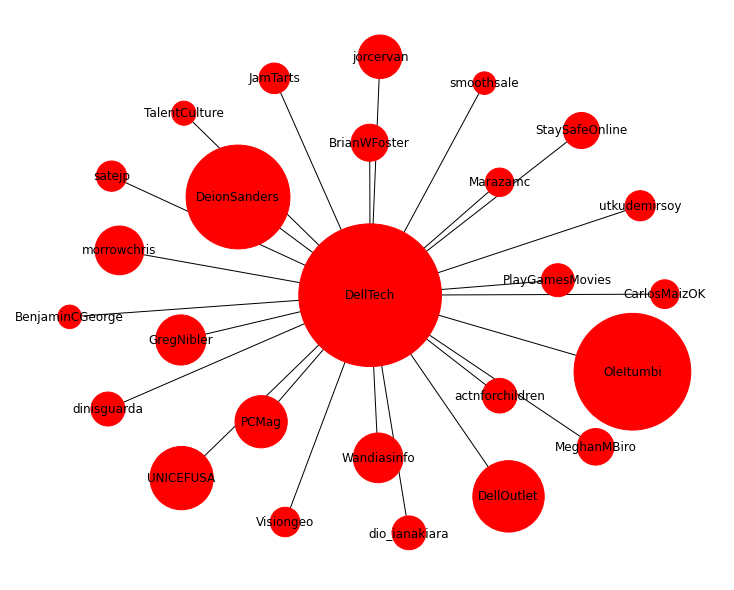

In [56]:
G = nx.from_pandas_edgelist(df[:-1], source='source', target='target')
figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='red', node_size=size)
plt.savefig("twitter_followers.png")
plt.show()
